# Comparaison of two policies

In this notebook, we give the possibilty to compare two policies

Given two trained policies, for each policy we will simulate a certain number of rounds against a random policy, and we check if one is significantly better than the other

## Imports

In [13]:
import statsmodels
import pandas as pd
import numpy as np
import scipy.stats as scs
import sys
sys.path.append("../")
import matplotlib.pyplot as plt

from generate_rounds_with_policies import policy_competition
from utils_policy_comparaison import size_sample_AB_test, test_H0, power_test, confidence_interval_diff

In [3]:
NUM_EPISODES = 5001
policy_algo = ["Random",
               "Random",
               "Random",
               "Random"]

contrat_model_path = None


random_data, random_attack = policy_competition(policies=policy_algo, 
                                                env_name = "coinche-v3",
                                                contrat_model_path=contrat_model_path, 
                                                NUM_EPISODES=NUM_EPISODES)

Contrat model passed:  None
Contrat model passed:  None
0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
Done


In [4]:
random_data.head()

,atout_7_p1,atout_8_p1,atout_9_p1,atout_10_p1,atout_jack_p1,atout_queen_p1,atout_king_p1,atout_as_p1,na1_7_p1,na1_8_p1,...,na2_as_p4,na3_7_p4,na3_8_p4,na3_9_p4,na3_10_p4,na3_jack_p4,na3_queen_p4,na3_king_p4,na3_as_p4,total_reward
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,128.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,104.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,106.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0


## Sizing the test

In a first approach, we are making an A/B test. So we need to to have an estimation of the size of the samples that will be needed

count    5001.000000
mean       80.889422
std        35.181392
min         0.000000
25%        55.000000
50%        81.000000
75%       106.000000
max       162.000000
Name: total_reward, dtype: float64


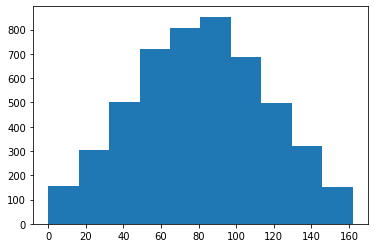

In [5]:
plt.hist(random_data["total_reward"])
print(random_data["total_reward"].describe())

In [3]:
# We want to be able to detect one point of difference of total reward for the attack, and one point for defense
mde = 1
risk1 = 0.05
risk2 = 0.2

# under a random policy, the distribution is centered in 82 with std of 35
std = 35

In [48]:
size_sample_AB_test(risk1, risk2, var = std**2, mde = mde, bilateral=True)

19229.755349155268

We will make the assumption that std is not really moving even with better policies.
Moreover, we'll take a bit bigger samples to be sure (as it doesn't cost anything to do so)

## Comparing policies

TOTAL_REWARD is the total reward for the team in which there is the GymPlayer. Usually, it is set for team 0 (player 0 and player 2)

In [6]:
# Given the A/B test sizing performed above, we need 20000 rounds for attacks and 
# 20000 for defense. As the reward model is called on random games, attacks and defens
# will be 50%-50%

NUM_EPISODES = 40000

# If we want to save the data after
save = True

#Policy_algo is a list. Each value of the list is the policy of player i
policy_algo = ["../experiments/coinche/09_05_2020-15_13/checkpoint/311_Step-79961.ckpt",
               "Random",
               '../experiments/coinche/09_05_2020-15_13/checkpoint/311_Step-79961.ckpt',
               "Random"]

# contrat_model_path is none if we want to set the contrat given the games quality
contrat_model_path = "../reward_prediction/reward_model.h5"
# contrat_model_path = None

competition_data, competition_attack = policy_competition(policies=policy_algo, 
                                                          env_name = "coinche-v3",
                                                          contrat_model_path=contrat_model_path, 
                                                          NUM_EPISODES=NUM_EPISODES)

if save:
    competition_data.to_csv("./data/competition_against_random.csv")
    competition_attack.to_csv("./data/attacks_against_random.csv")
    
    competition_data = pd.read_csv("./data/competition_against_random.csv")
    competition_attack = pd.read_csv("./data/attacks_against_random.csv")

Contrat model passed:  None
Contrat model passed:  None
INFO:tensorflow:Restoring parameters from ../experiments/coinche/09_05_2020-15_13/checkpoint/311_Step-79961.ckpt
INFO:tensorflow:Restoring parameters from ../experiments/coinche/09_05_2020-15_13/checkpoint/311_Step-79961.ckpt
0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
25000
25500
26000
26500
27000
27500
28000
28500
29000
29500
30000
30500
31000
31500
32000
32500
33000
33500
34000
34500
35000
35500
36000
36500
37000
37500
38000
38500
39000
39500
Done


In [8]:
competition_data = competition_data.merge(competition_attack,
                                          right_index = True,
                                          left_index = True)

competition_data['total_reward_team_02'] = competition_data['total_reward']
competition_data['total_reward_team_13'] = 162-competition_data['total_reward']

# Check repartition of attack vs defens
competition_data['p0'].value_counts()

0    20076
1    19924
Name: p0, dtype: int64

Let's set the attack and defens datasets

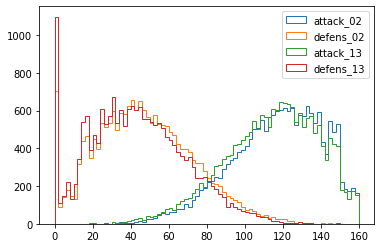

In [29]:
attack_02 = competition_data[competition_data['p0']==1]['total_reward_team_02']
defens_02 = competition_data[competition_data['p0']==0]['total_reward_team_02']
attack_13 = competition_data[competition_data['p1']==1]['total_reward_team_13']
defens_13 = competition_data[competition_data['p1']==0]['total_reward_team_13']

kwargs = dict(histtype='step', 
              bins=np.arange(0, 162, 2))

plt.hist(attack_02,  label = "attack_02", **kwargs)
plt.hist(defens_02, label = "defens_02",  **kwargs)
plt.hist(attack_13,  label = "attack_13", **kwargs)
plt.hist(defens_13, label = "defens_13",  **kwargs)
plt.legend()
plt.show()


In [10]:
defens_02.describe(), defens_13.describe()

(count    20076.000000
 mean        46.856794
 std         25.567250
 min          0.000000
 25%         28.000000
 50%         45.000000
 75%         64.000000
 max        144.000000
 Name: total_reward_team_02, dtype: float64,
 count    19924.000000
 mean        43.182594
 std         25.254417
 min          0.000000
 25%         24.000000
 50%         42.000000
 75%         60.000000
 max        149.000000
 Name: total_reward_team_13, dtype: float64)

In [11]:
attack_02.describe(), attack_13.describe()

(count    19924.000000
 mean       118.817406
 std         25.254417
 min         13.000000
 25%        102.000000
 50%        120.000000
 75%        138.000000
 max        162.000000
 Name: total_reward_team_02, dtype: float64,
 count    20076.000000
 mean       115.143206
 std         25.567250
 min         18.000000
 25%         98.000000
 50%        117.000000
 75%        134.000000
 max        162.000000
 Name: total_reward_team_13, dtype: float64)

#### Let's perform the tests

In [24]:
# Attack

print('test attacks: ', test_H0(attack_02, attack_13, risk1, bilateral=True))
print("power attacks: ", power_test(attack_02, attack_13, mde, risk1, bilateral=True))
print('test defens: ', test_H0(defens_02, defens_13, risk1, bilateral=True))
print("power attacks: ", power_test(defens_02, defens_13, mde, risk1, bilateral=True))

test attacks:  (True, 1.959963984540054, -14.459510146699229)
power attacks:  0.9758916149831429
test defens:  (True, 1.959963984540054, -14.459510146699229)
power attacks:  0.9758916149831429


If test_H0 returns True, then, we can accept H0, that is to say that the tested distribution have the same MEAN.
In that case, we check the power of the test. It should be greated than risk2 = 80%

If test_H0 is False, please check the value of the confidence of intervale to check the value of the difference of the means between the two distribution

In [26]:
print(confidence_interval_diff(attack_02, attack_13))
print(confidence_interval_diff(defens_02, defens_13))

(-4.172232432820913, -3.1761682180844915, 1.959963984540054)
(-4.172232432820913, -3.1761682180844915, 1.959963984540054)
